# Geometrical form factor for LIDAR function

La technologie LIDAR permet d'analyser les propriétés d'un objet ayant réfléchi la lumière lui ayant été projetée. Cette méthode nécessite un émetteur et un récepteur. Dans notre cas, un laser diffuse plusieurs rayons qui se réfléchiront sur un obstacle et seront récoltés par un téléscope.

Définissons les variables suivantes :
- La distance considérée entre un obstacle et les deux appareils : $z$.
- La distance entre le centre du faisceau laser et du télescope : $d$.
- La focale de la lentille du télescope : $f$.
- Le rayon initial du faisceau laser : $r_l$.
- Le rayon initial du faisceau du télescope : $r_t$.
- L'angle de diffusion formé autour du faisceau laser : $\varphi_l$.
- L'angle de diffusion formé autour du faisceau du télescope : $\varphi_t$.
- L'aire de recouvrement entre le faisceau laser et le faisceau du télescope : $\mathcal{A}$.
- Le facteur d'extinction : $\alpha$.

Définissons les fonctions $w_l$ et $w_t$ telles que :
$$w_l : z \mapsto w_l(z)$$
$$w_t : z \mapsto w_t(z)$$

où $w_l(z)$ et $w_t(z)$ correspondent aux rayons respectifs du faisceau laser et du faisceau du télescope à la distance $z$.

In [90]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

### $\phi$ - function

In [91]:
def phi_function(r_1, r_2, d):
    return np.arccos((r_1**2 + d**2 - r_2**2) / (2*d*r_1))

### $\chi$ - function

In [92]:
def chi_function(r_1, r_2, d):
    return ((r_1 + r_2)**2 - d**2) * (d**2 - (r_1 - r_2)**2)

### $\mathcal{A}$ - function

In [93]:
def a_function(r_1, r_2, d): 
    c_1, c_2 = d > r_1 + r_2, d < np.abs(r_1 - r_2)
    if c_1:
        return 0
    elif c_2:
        return np.pi * np.minimum(r_1**2, r_2**2)
    else:
        phi_1, phi_2 = phi_function(r_1, r_2, d), phi_function(r_2, r_1, d)
        chi = chi_function(r_1, r_2, d)
        return phi_1 * r_1**2 + phi_2 * r_2**2 - 0.5 * np.sqrt(chi)

### $w_l$ - function

In [94]:
def w_laser_function(r_laser, phi_laser, z):
    return r_laser + np.tan(phi_laser)*z

### $w_t$ - function

In [95]:
def w_telescope_function(r_telescope, phi_telescope, z):
    return r_telescope + np.tan(phi_telescope)*z

### $\bar{r}$ - function

In [96]:
def r_bar_function(r_laser, phi_laser, alpha, rho, z):
    return np.maximum(w_laser_function(r_laser, phi_laser, z), alpha + rho)

### $S$ - function

In [97]:
def s_function(r_laser, phi_laser, alpha, rho, d, z):
    w_laser = w_laser_function(r_laser, phi_laser, z)
    r_bar = r_bar_function(r_laser, phi_laser, alpha, rho, z)
    c_1, c_2 = alpha + rho < d - w_laser, w_laser + d < np.abs(alpha - rho)#, (w_laser >= np.abs(alpha - rho)) and (w_laser <= alpha + rho),
    if c_1:
        return 0
    elif c_2:
        return np.pi * w_laser**2 * np.minimum(alpha**2, rho**2)
    else:
        chi = chi_function(alpha, rho, d)
        #chi = chi_function(alpha, rho, w_laser)
        return r_bar**2 * a_function(alpha, rho, r_bar) + 0.25 * (r_bar**2 - alpha**2 - rho**2) * np.sqrt(chi) + (alpha*rho)**2 * np.arccos((alpha**2 + rho**2 - r_bar**2) / (2*alpha*rho))

### $G_{FF}$ - function

In [98]:
def gff_function(r_telescope, r_laser, phi_laser, alpha, d, b, z):
    return (s_function(r_laser, phi_laser, alpha, r_telescope, d, z) - s_function(r_laser, phi_laser, alpha, b, d, z)) / w_laser_function(r_laser, phi_laser, z)**2

## Results analysis

### Overlap area

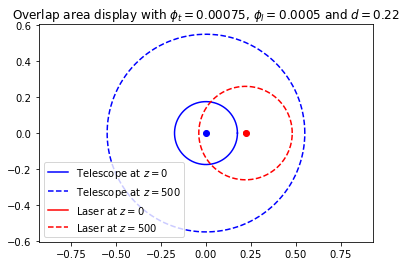

In [99]:
r_telescope = 0.175
r_laser = 0.01
b = 0.04
d = 0.22
phi_laser = 5e-4
phi_telescope = 7.5e-4

n = 1000

z = np.linspace(0.01, 500, n)

w_laser, w_telescope = w_laser_function(r_laser, phi_laser, z), w_telescope_function(r_telescope, phi_telescope, z)

t = np.linspace(0, 2*np.pi, n)

x_telescope_first = w_telescope[0] * np.cos(t)
y_telescope_first = w_telescope[0] * np.sin(t)
x_telescope_last = w_telescope[-1] * np.cos(t)
y_telescope_last = w_telescope[-1] * np.sin(t)
x_telescope_centre, y_telescope_centre = 0, 0

x_laser_first = d + w_laser[0] * np.cos(t)
y_laser_first = w_laser[0] * np.sin(t)
x_laser_last = d + w_laser[-1] * np.cos(t)
y_laser_last = w_laser[-1] * np.sin(t)
x_laser_centre, y_laser_centre = d, 0

plt.figure()
plt.plot(x_telescope_centre, y_telescope_centre, 'o', color = 'b')
plt.plot(x_telescope_first, y_telescope_first, color = 'b', label = "Telescope at $z =" + str(int(z[0])) + "$")
plt.plot(x_telescope_last, y_telescope_last, '--', color = 'b', label = "Telescope at $z =" + str(int(z[-1])) + "$")
plt.plot(x_laser_centre, y_laser_centre, 'o', color = 'r')
plt.plot(x_laser_first, y_laser_first, color = 'r', label = "Laser at $z =" + str(int(z[0])) + "$")
plt.plot(x_laser_last, y_laser_last, '--', color = 'r', label = "Laser at $z =" + str(int(z[-1])) + "$")
plt.axis('equal')
plt.legend(loc = "lower left")
plt.title("Overlap area display with $\phi_t =" + str(phi_telescope) + "$, $\phi_l =" + str(phi_laser) + "$ and $d =" + str(d) + "$")
plt.show()

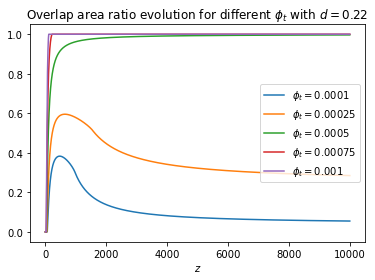

In [100]:
n = int(10e4)

z = np.linspace(0.01, 10e3, n)

phi_telescope_list = np.array([1e-4, 2.5e-4, 5e-4, 7.5e-4, 1e-3])

plt.figure()
for phi_telescope in phi_telescope_list:
    w_laser, w_telescope = w_laser_function(r_laser, phi_laser, z), w_telescope_function(r_telescope, phi_telescope, z)
    a = np.array([a_function(w_laser[k], w_telescope[k], d) for k in range(z.shape[0])])
    plt.plot(z, a/(np.pi*w_laser**2), label = "$\phi_t =" + str(phi_telescope) + "$")
plt.xlabel("$z$")
plt.legend()
plt.title("Overlap area ratio evolution for different $\phi_t$ with $d =" + str(d) + "$")
plt.show()

<ipython-input-97-473689c190ab>:12: RuntimeWarning: invalid value encountered in sqrt
  return r_bar**2 * a_function(alpha, rho, r_bar) + 0.25 * (r_bar**2 - alpha**2 - rho**2) * np.sqrt(chi) + (alpha*rho)**2 * np.arccos((alpha**2 + rho**2 - r_bar**2) / (2*alpha*rho))
<ipython-input-91-073dee21d380>:2: RuntimeWarning: invalid value encountered in arccos
  return np.arccos((r_1**2 + d**2 - r_2**2) / (2*d*r_1))
<ipython-input-97-473689c190ab>:12: RuntimeWarning: invalid value encountered in arccos
  return r_bar**2 * a_function(alpha, rho, r_bar) + 0.25 * (r_bar**2 - alpha**2 - rho**2) * np.sqrt(chi) + (alpha*rho)**2 * np.arccos((alpha**2 + rho**2 - r_bar**2) / (2*alpha*rho))


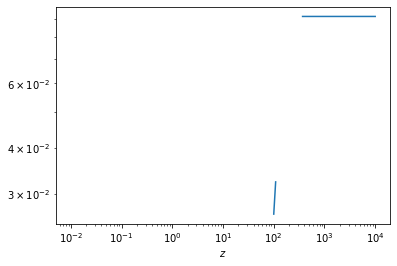

In [101]:
n = int(1e4)
z = np.linspace(0.01, 10e3, n)

d = 0

phi_telescope = 1e-3

alpha = z*phi_telescope

gff = np.array([gff_function(r_telescope, r_laser, phi_laser, alpha[k], d, b, z[k]) for k in range(z.shape[0])])

plt.figure()
plt.loglog(z, gff)
plt.xlabel("$z$")
plt.show()